In [16]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [17]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [18]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, text

In [19]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [20]:
# Create the inspector and connect it
inspector = inspect(engine)
# reflect an existing database into a new model

# reflect the tables
tables = inspector.get_table_names()

# use the inspector to print the column names within each table and their types
for table in tables:
    print(table)
    columns = inspector.get_columns(table)
    for column in columns:
        print(column['name'], column['type'])
        
    print()

measurement
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

station
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT



In [21]:
# Save references to each table 1/2
meas_query = "SELECT * from measurement;"

m_df = pd.read_sql(text(meas_query), con=engine)
m_df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [22]:
# Save references to each table 2/2
station_query = "SELECT * from station;"

s_df = pd.read_sql(text(station_query), con=engine)
s_df.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


# Exploratory Precipitation Analysis

In [24]:
# Find the most recent date in the data set.
query = "SELECT max(date) from measurement;"

data = engine.execute(text(query))
for record in data:
    print(record)

('2017-08-23',)


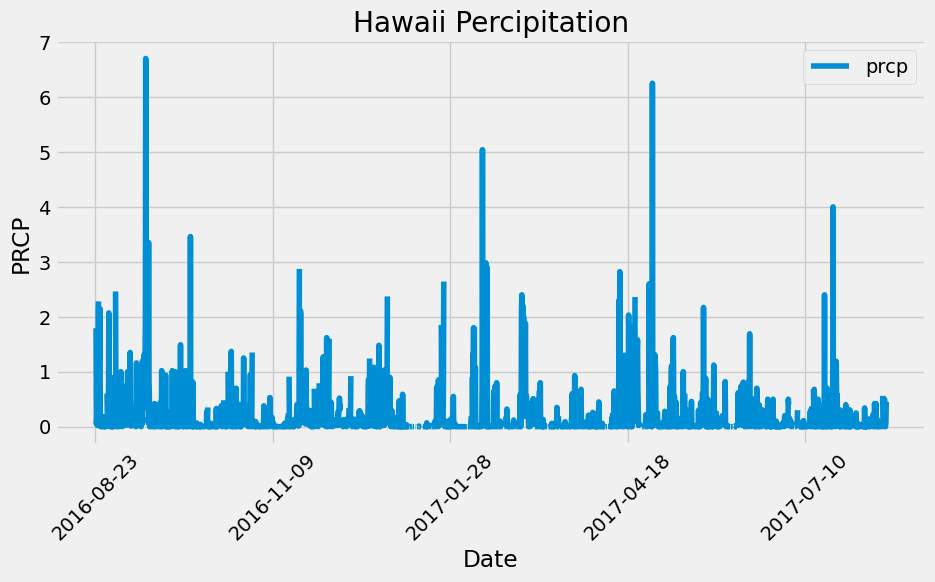

In [25]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
query = """SELECT
                date,
                station,
                prcp
            FROM 
                measurement
            WHERE
                date >= '2016-08-23';
"""

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.read_sql(text(query), con=engine)

# Sort the dataframe by date
df = df.sort_values(by="date")

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(kind="line", x="date", y="prcp", rot=45, xlabel="Date", ylabel="PRCP", title="Hawaii Percipitation",figsize=(10, 5))
plt.show()

#### Use Pandas to calculate the summary statistics for the precipitation data


# Exploratory Station Analysis

In [26]:
# Design a query to calculate the total number of stations in the dataset
query2 = "SELECT count(id)FROM station; "

data=engine.execute(text(query2))
for record in data:
    print(record)

(9,)


In [27]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
query3 = """SELECT
                station,
                count(id) as num_obs
            FROM 
                measurement
            GROUP BY
                station
            ORDER BY
                num_obs desc;
"""

df2 = pd.read_sql(text(query3), con=engine)
df2.head()

,station,num_obs
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612


In [28]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
query4= """
        SELECT
            min(tobs),
            max(tobs),
            avg(tobs)
        FROM 
            measurement
        WHERE
            station = "USC00519281"
"""

df3 = pd.read_sql(text(query4), con=engine)
df3.head()

,min(tobs),max(tobs),avg(tobs)
0,54.0,85.0,71.663781


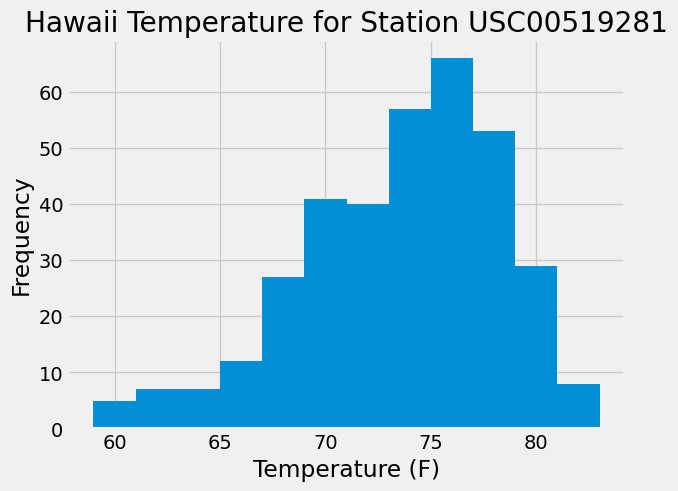

In [33]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Credit to Prof Booth for code
query5= """SELECT
                date,
                station,
                tobs
            FROM 
                measurement
            WHERE
                date >= '2016-08-23'
                AND station = 'USC00519281'
            ORDER BY
                date asc;
"""

df4 = pd.read_sql(text(query5), con=engine)
# df4.head()
df4.tobs.plot.hist(bins=12, title="Hawaii Temperature for Station USC00519281",xlabel="Temperature (F)", ylabel="Frequency")
plt.show()

# Close Session